# **2η εργαστηριακή άσκηση στα Νευρωνικά Δίκτυα - Μέρος 1. Σύστημα Συστάσεων**


**Πάλμος Στέφανος el18185**

**Ντάγκας Παναγιώτης el18018**

**Νικόλαρος Ανδρέας el18401** 

check2

In [22]:
!pip install --upgrade --no-cache-dir pip
!pip install --upgrade --no-cache-dir numpy
!pip install --upgrade --no-cache-dir pandas
!pip install --upgrade --no-cache-dir nltk
!pip install --upgrade --no-cache-dir scikit-learn
!pip install --upgrade --no-cache-dir joblib

In [23]:
!pip install num2words

In [1]:
import pandas as pd
import numpy as np
import random
import nltk
import string
import joblib
import num2words
import matplotlib
import scipy as sp
import collections
from nltk import word_tokenize  
from nltk.corpus import stopwords
from sklearn.cluster import KMeans
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction import text
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
import re

%matplotlib inline

nltk.download('names')
nltk.download('punkt')

nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package names to
[nltk_data]     C:\Users\panos\AppData\Roaming\nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\panos\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\panos\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\panos\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
dataset_url = "https://drive.google.com/uc?export=download&id=1zo13kUAf-MDMPZmBDxq1FxWtZY01lsxD"
df_data_1 = pd.read_csv(dataset_url, sep='\t',  header=None, quoting=3)

In [13]:
# Στο επόμενη γραμή βάλτε τον αριθμό της ομάδας στο εργαστήριο των νευρωνικών
team_seed_number = 13

movie_seeds_url = "https://drive.google.com/uc?export=download&id=1g6F4TCHrs2wgtdOk7D3gtONaeirNt_Vo"
df_data_2 = pd.read_csv(movie_seeds_url, header=None)

# επιλέγεται 
my_index = df_data_2.iloc[team_seed_number,:].values

titles = df_data_1.iloc[:, [2]].values[my_index] # movie titles (string)
categories = df_data_1.iloc[:, [3]].values[my_index] # movie categories (string)
bins = df_data_1.iloc[:, [4]]
catbins = bins[4].str.split(',', expand=True).values.astype(float)[my_index] # movie categories in binary form (1 feature per category)
summaries =  df_data_1.iloc[:, [5]].values[my_index] # movie summaries (string)
corpus = summaries[:,0].tolist() # list form of summaries
corpus_df = pd.DataFrame(corpus) # dataframe version of corpus

In [27]:
print(titles)

[['Vicky the Viking']
 ["'Neath the Arizona Skies"]
 ['Dear Mr. Prohack']
 ...
 ['Bride of the Gorilla']
 ['The China Syndrome']
 ['Bheja fry']]


In [28]:
print(categories)
print(catbins[0])

[['"Family-Oriented Adventure",  "Children\'s/Family"']
 ['"Action/Adventure",  "Western",  "Action",  "Black-and-white",  "B-Western"']
 ['"Romance Film",  "Comedy"']
 ...
 ['"Thriller",  "B-movie",  "Science Fiction",  "Horror",  "Black-and-white"']
 ['"Thriller",  "Disaster",  "Suspense",  "Action/Adventure"']
 ['"Art film",  "World cinema",  "Musical",  "Drama",  "Comedy",  "Bollywood"']]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0

In [29]:
print(corpus[0])

Vicky  is the son of Halvar , chief of the Viking village of Flake. Halvar is a strong and big warrior who measures the strength of people through muscles. Vicky, on the other hand, is a small but very smart boy who always has to prove his father that ingenuity of a man can meet muscles. One day the village of Flake falls under attack, and all the children – including Vicky’s girlfriend Ylvi  – are kidnapped except for Vicky himself, so Vicky, his father Halvar and the other Vikings of the village decide to go out and try to rescue them.http://www.wickie.film.de/ The kidnappers turn out to be Sven the Terrible and his band of Viking pirates, who are hunting for a legendary treasure, and in order to gain it, they need the assistance of a child who has never spoken a lie in his or her life. Whilst in pursuit, the Flake Vikings pick up a young Chinese girl and an obnoxious bard  for company, and together they succeed in rescuing the children, outsmarting Sven and escaping back to Flake wi

In [30]:
display(corpus_df)

,0
0,"Vicky is the son of Halvar , chief of the Vik..."
1,"Chris Morrell , the guardian of half-Indian gi..."
2,A civil servant who is extremely frugal with t...
3,Frankie is the coxswain on the rowing team at ...
4,Jean Leonnec and Marise La Noue are pennyles...
...,...
4995,Widow Mary Bassett and her 3 children have hi...
4996,"The plot involves Kumiko Yamaguchi, the grandd..."
4997,"Deep in the South American jungles, plantation..."
4998,While visiting the Ventana nuclear power plant...


## **Προεπεξεργασία**

In [31]:
print(corpus[1])
print()
print(corpus[15])
print()
print(corpus[47])
print()
print(corpus[152])
print()

Chris Morrell , the guardian of half-Indian girl Nina , is helping her find her missing white father, so she can cash in on her late mother's oil lease. Outlaw Sam Black  is after the girl and her father as well. Besides dealing with the Black gang, Morrell has to find another robber, Jim Moore, who switches clothes with him after he finds Chris unconscious from a fight with Sam Black. Along the way, he meets a lady who's the sister of Jim Moore , another bad hombre who's in cahoots with Jim Moore, and an old friend who takes in Nina and helps Chris locate Nina's father and fight off the various desperadoes.NY Times review  Amazingly, although George Hayes had a featured character and speaking role, he was omitted from the cast list in the opening credits!

The movie is about one Adnan bin Saidi, a young Malay from Sungai Ramal in Kajang, Selangor who had joined the Malay Regiment of the British Colonial Forces just before the Second World War broke out in Asia. By the time the war bro

In [32]:
step=160
with open('random_corpus.txt', 'w', encoding='utf-8') as f:
    randsamples = random.sample(corpus, 30)
    for i,sam in enumerate(randsamples):
        for j in range(0, len(sam), step):
            f.write(sam[j:(j+step)])
            f.write("\n")
            
        f.write("\n\n")


Προβλήματα: πολύ μικρές συμβολοσειρές, ειδικοί χαρακτήρες όπως *,},] , αριθμητικοί χαρακτήρες -> λέξεις, απόστροφοι, URLs

In [33]:
tokens = []

for doc in corpus:
    doc_str = re.sub(r"http\S+", '', doc)
    doc_str = re.sub(r'\d{1,2}(?:st|nd|rd|th|am|pm)', "", doc_str)
    tokens.append(nltk.word_tokenize(doc_str))

print(tokens[0])

['Vicky', 'is', 'the', 'son', 'of', 'Halvar', ',', 'chief', 'of', 'the', 'Viking', 'village', 'of', 'Flake', '.', 'Halvar', 'is', 'a', 'strong', 'and', 'big', 'warrior', 'who', 'measures', 'the', 'strength', 'of', 'people', 'through', 'muscles', '.', 'Vicky', ',', 'on', 'the', 'other', 'hand', ',', 'is', 'a', 'small', 'but', 'very', 'smart', 'boy', 'who', 'always', 'has', 'to', 'prove', 'his', 'father', 'that', 'ingenuity', 'of', 'a', 'man', 'can', 'meet', 'muscles', '.', 'One', 'day', 'the', 'village', 'of', 'Flake', 'falls', 'under', 'attack', ',', 'and', 'all', 'the', 'children', '–', 'including', 'Vicky', '’', 's', 'girlfriend', 'Ylvi', '–', 'are', 'kidnapped', 'except', 'for', 'Vicky', 'himself', ',', 'so', 'Vicky', ',', 'his', 'father', 'Halvar', 'and', 'the', 'other', 'Vikings', 'of', 'the', 'village', 'decide', 'to', 'go', 'out', 'and', 'try', 'to', 'rescue', 'them', '.', 'The', 'kidnappers', 'turn', 'out', 'to', 'be', 'Sven', 'the', 'Terrible', 'and', 'his', 'band', 'of', 'Vik

In [34]:
def thorough_filter(words):
    filtered_words = []
    for word in words:
        pun = []
        for letter in word:
            pun.append(letter in string.punctuation)
        if not all(pun):
            filtered_words.append(word)

    filt = []
    for i, word in enumerate(filtered_words):
        if '.' in word:
            words = word.split('.')
            filt.append(words[0])
            filt.append(words[1])
        else:
            filt.append(word)     

    filtered_words = filt[:]
    filt2 = []   
    for i, word in enumerate(filtered_words):
        if '-' in word:
            words = word.split('-')
            filt2.append(words[0])
            filt2.append(words[1])
        else:
            filt2.append(word)
    return filt2

In [35]:
def isEnglish(s):
    try:
        s.encode(encoding='utf-8').decode('ascii')
    except UnicodeDecodeError:
        return False
    else:
        return True

In [36]:
f1 = open("names.txt")
line = f1.readline().replace("\n", "")
names = {}
while(line):
    names[line] = 1
    line = f1.readline().replace("\n", "") 

In [37]:
custom_common =  ["n't", "'s", "’", "–", "film", "movie", "people", "person", "episode"]
stop_words = stopwords.words('english') + list(string.punctuation) + custom_common
stop_words_set = set(stop_words)
for i in range(len(tokens)):
    tokens[i] = [word for word in tokens[i] if (word not in stop_words_set) and (len(word) > 2) and (isEnglish(word)) and (not word.isnumeric()) and (not word in names) and (not "\'" in word)]
    tokens[i] = thorough_filter(tokens[i])
    
print(tokens[0])

['son', 'Halvar', 'chief', 'Viking', 'village', 'Flake', 'Halvar', 'strong', 'big', 'warrior', 'measures', 'strength', 'muscles', 'hand', 'small', 'smart', 'boy', 'always', 'prove', 'father', 'ingenuity', 'man', 'meet', 'muscles', 'One', 'day', 'village', 'Flake', 'falls', 'attack', 'children', 'including', 'girlfriend', 'Ylvi', 'kidnapped', 'except', 'father', 'Halvar', 'Vikings', 'village', 'decide', 'try', 'rescue', 'The', 'kidnappers', 'turn', 'Terrible', 'band', 'Viking', 'pirates', 'hunting', 'legendary', 'treasure', 'order', 'gain', 'need', 'assistance', 'child', 'never', 'spoken', 'lie', 'life', 'Whilst', 'pursuit', 'Flake', 'Vikings', 'pick', 'young', 'Chinese', 'girl', 'obnoxious', 'bard', 'company', 'together', 'succeed', 'rescuing', 'children', 'outsmarting', 'escaping', 'back', 'Flake', 'treasure']


In [38]:
for i in range(len(tokens)):
    for j, token in enumerate(tokens[i]):
        tokens[i][j] = token.lower()

print(tokens[0])

['son', 'halvar', 'chief', 'viking', 'village', 'flake', 'halvar', 'strong', 'big', 'warrior', 'measures', 'strength', 'muscles', 'hand', 'small', 'smart', 'boy', 'always', 'prove', 'father', 'ingenuity', 'man', 'meet', 'muscles', 'one', 'day', 'village', 'flake', 'falls', 'attack', 'children', 'including', 'girlfriend', 'ylvi', 'kidnapped', 'except', 'father', 'halvar', 'vikings', 'village', 'decide', 'try', 'rescue', 'the', 'kidnappers', 'turn', 'terrible', 'band', 'viking', 'pirates', 'hunting', 'legendary', 'treasure', 'order', 'gain', 'need', 'assistance', 'child', 'never', 'spoken', 'lie', 'life', 'whilst', 'pursuit', 'flake', 'vikings', 'pick', 'young', 'chinese', 'girl', 'obnoxious', 'bard', 'company', 'together', 'succeed', 'rescuing', 'children', 'outsmarting', 'escaping', 'back', 'flake', 'treasure']


In [39]:
joblib.dump(tokens, 'tokens.pkl')

['tokens.pkl']

In [ ]:
tokens = joblib.load('tokens.pkl')
print(tokens[0])

['son', 'halvar', 'chief', 'viking', 'village', 'flake', 'halvar', 'strong', 'big', 'warrior', 'measures', 'strength', 'muscles', 'hand', 'small', 'smart', 'boy', 'always', 'prove', 'father', 'ingenuity', 'man', 'meet', 'muscles', 'one', 'day', 'village', 'flake', 'falls', 'attack', 'children', 'including', 'girlfriend', 'ylvi', 'kidnapped', 'except', 'father', 'halvar', 'vikings', 'village', 'decide', 'try', 'rescue', 'the', 'kidnappers', 'turn', 'terrible', 'band', 'viking', 'pirates', 'hunting', 'legendary', 'treasure', 'order', 'gain', 'need', 'assistance', 'child', 'never', 'spoken', 'lie', 'life', 'whilst', 'pursuit', 'flake', 'vikings', 'pick', 'young', 'chinese', 'girl', 'obnoxious', 'bard', 'company', 'together', 'succeed', 'rescuing', 'children', 'outsmarting', 'escaping', 'back', 'flake', 'treasure']


In [ ]:
def has_numbers(inputString):
    return bool(re.search(r'\d', inputString))

In [42]:
tokens_stemmed = []
stemmer = SnowballStemmer('english')
for token in tokens:
    tokens_stemmed.append(" ".join([stemmer.stem(word) for word in token if (not has_numbers(word))]))

print(tokens_stemmed[0])

son halvar chief vike villag flake halvar strong big warrior measur strength muscl hand small smart boy alway prove father ingenu man meet muscl one day villag flake fall attack children includ girlfriend ylvi kidnap except father halvar vike villag decid tri rescu the kidnapp turn terribl band vike pirat hunt legendari treasur order gain need assist child never spoken lie life whilst pursuit flake vike pick young chines girl obnoxi bard compani togeth succeed rescu children outsmart escap back flake treasur


In [43]:
joblib.dump(tokens_stemmed, 'tokens_stemmed.pkl')

['tokens_stemmed.pkl']

In [ ]:
tokens_stemmed = joblib.load('tokens_stemmed.pkl')

## **Μετατροπή σε TFIDF** 

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
vectorizer.fit(tokens_stemmed)
corpus_tf_idf = vectorizer.transform(tokens_stemmed).toarray()
print(corpus_tf_idf)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
df = pd.DataFrame(corpus_tf_idf, columns = vectorizer.get_feature_names_out())
display(df) 

,aadhi,aadmi,aakrosh,aamna,aanu,aarav,aardvark,aarfi,aaronson,aarthi,...,zurich,zwaiter,zwi,zwick,zwieback,zwischensaison,zwittau,zwordar,zygon,zyklon
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## **Σύστημα Συστάσεων**

In [ ]:
def content_recommender(target_movie, max_recommendations, corpus_type):
    cos_sim = np.zeros(len(corpus_type))
    for i in range(len(corpus_type)):
        if (corpus_type[i].any()):
            cos_sim[i] = sp.spatial.distance.cosine(corpus_type[target_movie], corpus_type[i])
        else:
            cos_sim[i] = 1
    recommended = cos_sim.argsort()[:(max_recommendations+1)]
    print("Target Movie ")
    print("\tID:", target_movie)
    print("\tTitle:", titles[target_movie])
    print("\tSummary:", summaries[target_movie])
    print("\tCategories:", categories[target_movie])

    j=1
    for i in range(0, len(recommended)):
        if (recommended[i] == target_movie):
            continue
        print()
        print("Recommended Movie:", j)
        print("Cosine Similarity:", 1 - cos_sim[recommended[i]])
        print("\tID:", recommended[i])
        print("\tTitle:", titles[recommended[i]])
        print("\tSummary:", summaries[recommended[i]])
        print("\tCategories:", categories[recommended[i]])
        j += 1

In [ ]:
content_recommender(4999, 3, corpus_tf_idf)

Ταινίες με καλά recommendations: 4999, 1013, 3042, 490, 666, 2222, 4881, 4507, 4086, 2377

In [ ]:
content_recommender(1013, 3, corpus_tf_idf)

In [ ]:
content_recommender(3042, 3, corpus_tf_idf)

In [ ]:
content_recommender(490, 3, corpus_tf_idf)

In [ ]:
content_recommender(4507, 3, corpus_tf_idf)

In [ ]:
content_recommender(2377, 3, corpus_tf_idf)

## **Βελιστοποίηση του TFIDF Vectorizer**

min_df = 0.0005, max_df = 0.3

In [ ]:
vectorizer_optimized = TfidfVectorizer(stop_words='english', min_df=0.02, max_df=0.3)
vectorizer_optimized.fit(tokens_stemmed)
corpus_tf_idf_optimized = vectorizer_optimized.transform(tokens_stemmed).toarray()
print(corpus_tf_idf_optimized.shape)

(5000, 1039)


Bad recommendations: 289, 2331, 4732, 477, 100

In [55]:
#content_recommender(1013, 6, corpus_tf_idf)

In [56]:
content_recommender(3042, 6, corpus_tf_idf_optimized)

Target Movie 
	ID: 3042
	Title: ['Ashes and Diamonds']
	Summary: ["In an unnamed small Polish town on May 8, 1945, the day Germany officially surrendered, Maciek  and Andrzej  are Home Army soldiers who have been assigned to assassinate the communist Commissar Szczuka , but fail in their first attempt to ambush him, killing two civilian cement plant workers instead. They are given a second chance in the town's leading hotel and banquet hall, Monopol. Meanwhile, a grand fête is being organized at the hall for a newly appointed minor minister  by his assistant, Drewnowski . Drewnowski is in fact a double agent, present at the first attempt to kill Szczuka. Maciek manages to sweet talk himself into a room with the desk clerk, who is also a fellow Warsaw native. They sadly reminisce about such things as the older section of town and the chestnut trees which were lost when the Germans destroyed most of the city in the aftermath of the Warsaw Uprising. While Maciek and Andrzej bide their tim

## Χρήση Word Embeddings - Word2Vec

In [57]:
%pip install -U gensim

Note: you may need to restart the kernel to use updated packages.


In [58]:
import gensim.downloader
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [59]:
model = gensim.downloader.load("word2vec-google-news-300")
model.most_similar("cat")

[('cats', 0.8099379539489746),
 ('dog', 0.760945737361908),
 ('kitten', 0.7464985251426697),
 ('feline', 0.7326234579086304),
 ('beagle', 0.7150582671165466),
 ('puppy', 0.7075453400611877),
 ('pup', 0.6934291124343872),
 ('pet', 0.6891531348228455),
 ('felines', 0.6755931973457336),
 ('chihuahua', 0.6709762215614319)]

In [60]:
joblib.dump(model, 'model.pkl')

['model.pkl']

In [61]:
model = joblib.load('model.pkl')

In [62]:
tokens_preprocessed = []
for token in tokens:
    tokens_preprocessed.append(" ".join([word for word in token if (not has_numbers(word)) and (len(word)>2) and (not "\'" in word)]))

print(tokens_preprocessed[0])

son halvar chief viking village flake halvar strong big warrior measures strength muscles hand small smart boy always prove father ingenuity man meet muscles one day village flake falls attack children including girlfriend ylvi kidnapped except father halvar vikings village decide try rescue the kidnappers turn terrible band viking pirates hunting legendary treasure order gain need assistance child never spoken lie life whilst pursuit flake vikings pick young chinese girl obnoxious bard company together succeed rescuing children outsmarting escaping back flake treasure


In [63]:
def build_tfw2v(corpus, vectors, embeddings_size):
    tfw2v = []
    vectorizer = TfidfVectorizer()
    vectorizer.fit(corpus)
    corpus_tf_idf = vectorizer.transform(corpus).toarray()
    corpus_df = pd.DataFrame(corpus_tf_idf, columns = vectorizer.get_feature_names_out())
    for i,movie in enumerate(corpus):
        movie_tokens = movie.split(" ")
        w2v = np.zeros(embeddings_size)
        sum_tfidf = 0
        for word in movie_tokens:
            if word not in model:
                continue
            tfidf = corpus_df[word][i]
            sum_tfidf += tfidf
            vec = vectors[word]
            w2v += tfidf*np.array(vec)
        w2v = w2v/sum_tfidf
        tfw2v.append(w2v)
    return tfw2v

In [64]:
embeddings_corpora = build_tfw2v(tokens_preprocessed, model, 300)
print(len(embeddings_corpora[0]))

300


In [65]:
joblib.dump(embeddings_corpora, "embeddings.pkl")

['embeddings.pkl']

In [ ]:
embeddings_corpora = joblib.load("embeddings.pkl")

In [67]:
content_recommender(4999, 6, embeddings_corpora)

Target Movie 
	ID: 4999
	Title: ['Bheja fry']
	Summary: ['Ranjeet Thadani  is a music producer married to Sheetal  a singer. Ranjeet and his friends get together every Friday for a party. This is a different kind of party where they invite idiots to ridicule them behind the scenes and calling them "talent". They enjoy doing it so much that they don\'t even mind missing out on family appointments. One of Ranjeet\'s friends meets Bharat Bhushan , an inspector for the income tax department, on a trip to Pune and decides that he could probably be a source of entertainment for Ranjeet. Ranjeet promptly calls Bharat and invites him for dinner. Bharat is a talkative self promoting singer who carries with him a scrap book showcasing his musical life. He is excited at the prospect of meeting a music producer which might help advance his career as a singer. Bharat is kind-hearted and wants to help everyone but he also has the ability to mess things up for people around him. He can be annoying to

# **Εφαρμογή 2: Τοπολογική και σημασιολογική επεικόνιση ταινιών με χρήση SOM**

In [ ]:
def build_final_set(mycorpus, doc_limit = 5000, tf_idf_only=False):
    # convert sparse tf_idf to dense tf_idf representation
    dense_tf_idf = mycorpus.toarray()[0:doc_limit,:]
    if tf_idf_only:
        # use only tf_idf
        final_set = dense_tf_idf
    else:
        # append the binary categories features horizontaly to the (dense) tf_idf features
        final_set = np.hstack((dense_tf_idf, catbins[0:doc_limit,:]))
    # η somoclu θέλει δεδομ΄ένα σε float32
    return np.array(final_set, dtype=np.float32)

In [19]:
final_set = build_final_set(sp.sparse.csr_matrix(corpus_tf_idf_optimized), doc_limit=2000)
print(final_set.shape)

(2000, 1361)


In [20]:
joblib.dump(final_set, "final_set.pkl")

['final_set.pkl']

In [70]:
#!python -m pip install --upgrade somoclu==1.7.4

## **Εκπαίδευση χάρτη SOM**

In [127]:
# import sompoclu, matplotlib
import pkg_resources
pkg_resources.require("somoclu==1.7.4")
import somoclu
import matplotlib
import time
import joblib
# we will plot inside the notebook and not in separate window
%matplotlib inline

In [176]:
n_rows, n_columns = 10, 10
som = somoclu.Somoclu(n_columns, n_rows, compactsupport=False)
final_set = joblib.load("final_set.pkl")
%time som.train(final_set, epochs=100)

CPU times: total: 1min 31s
Wall time: 13.8 s


## **Best matching units**

In [177]:
bmus, indices = np.unique(som.bmus, axis=0, return_index=True)
print(len(bmus))

92


## **Clustering**

In [178]:
from sklearn.cluster import KMeans
%time som.cluster(KMeans(n_clusters=20))

c:\Users\panos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


CPU times: total: 1.66 s
Wall time: 275 ms


## **Αποθήκευση του SOM**

In [179]:
joblib.dump(som, "som.pkl")

['som.pkl']

In [ ]:
som = joblib.load("som.pkl")

## **Οπτικοποίηση U-matrix, Clustering και μέγεθος Clusters**

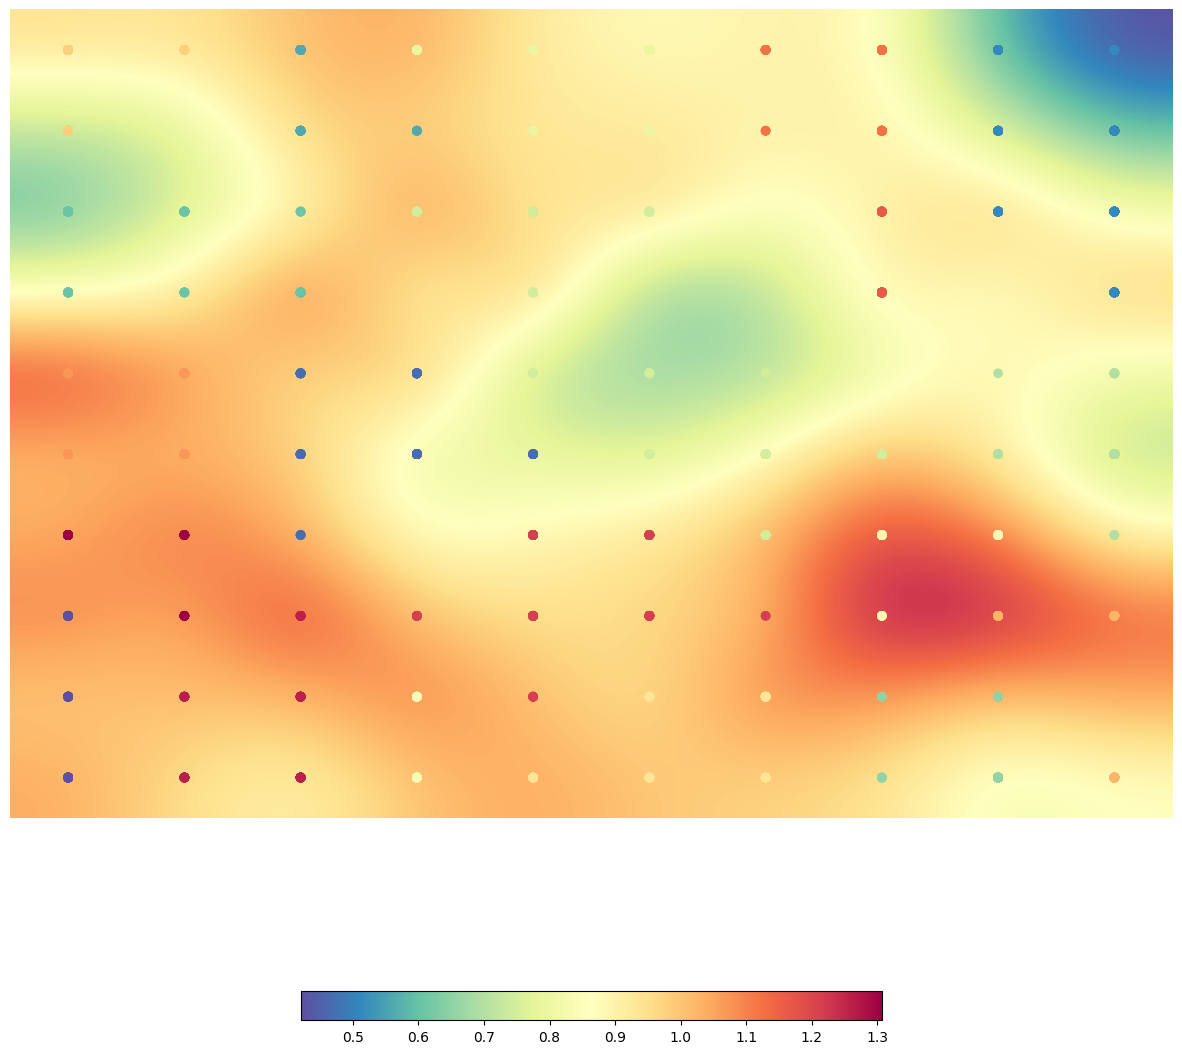

In [181]:
som.view_umatrix(bestmatches=True, colorbar=True,figsize=(15, 15)) 
matplotlib.pyplot.show()

In [182]:
print(som.clusters)

[[12 12  3  8  8  8 15 15  2  2]
 [12  4  3  3  8  8 15 15  2  2]
 [ 4  4  4  7  7  7 16 16  2  2]
 [ 4  4  4  1  7  7 16 16 16  2]
 [14 14  1  1  7  7  7 16  6  6]
 [14 14  1  1  1  7  7  7  6  6]
 [19 19  1  1 17 17  7 10 10  6]
 [ 0 19 18 17 17 17 17 10 13 13]
 [ 0 18 18  9 17 11 11  5  5 13]
 [ 0 18 18  9 11 11 11  5  5 13]]


In [183]:
clust, count = np.unique(som.clusters, return_counts=True)
sorted_clust = np.argsort(count)
print(list(clust[sorted_clust]))
print(list(count[sorted_clust]))

[9, 12, 10, 0, 3, 19, 5, 13, 14, 15, 6, 8, 18, 11, 16, 4, 2, 17, 1, 7]
[2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 5, 5, 5, 5, 6, 7, 7, 7, 8, 12]


## **Σημασιολογική ερμηνεία των Clusters**

In [63]:
def print_categories_stats(movie_ids):
    categories_stats = []
    for id in movie_ids:
        cats = (categories[id][0].replace(" ", "").replace('"', "")).split(",")
        categories_stats.extend(cats)

    unique_cats, count = np.unique(categories_stats, axis=0, return_counts=True)
    sorted_count = np.argsort(count)[::-1]
    stats = [(unique_cats[i], count[i]) for i in sorted_count]
    print("Overall Cluster Genres stats:")
    print(stats)
    return stats


In [64]:
def print_cluster_neurons_movies_report(cluster, bmus, som):
    clust_bmu = np.column_stack(np.where(som.clusters==cluster))
    
    neuron = []
    for bmu in clust_bmu:
        if bmu in bmus:
            neuron.append(bmu)

    return neuron

In [65]:
def neuron_movies_report(neurons, som):
    movie_ids = []
    for neuron in neurons:
        movie_ids.extend(list(np.where(np.all(som.bmus==neuron,axis=1))[0]))
    stats = print_categories_stats(movie_ids)
    return movie_ids, stats

In [235]:
cluster_bmus = print_cluster_neurons_movies_report(12, bmus, som)
ids, stats = neuron_movies_report(cluster_bmus, som)

Overall Cluster Genres stats:
(Comedy,75)
(RomanceFilm,70)
(Romanticcomedy,61)
(Indie,15)
(Comedy-drama,11)
(Teen,10)
(Musical,9)
(Comingofage,8)
(Drama,8)
(Fantasy,8)
(Black-and-white,6)
(EnsembleFilm,4)
(Sexcomedy,3)
(FantasyComedy,3)
(Buddyfilm,3)
(Adventure,3)
(FamilyFilm,3)
(Roadmovie,3)
(CrimeFiction,3)
(Musicalcomedy,3)
(Children's,3)
(Parody,3)
(ComedyofErrors,2)
(DomesticComedy,2)
(Action,2)
(Blackcomedy,2)
(Screwballcomedy,2)
(Slapstick,2)
(Sliceoflifestory,2)
(Sports,2)
(Televisionmovie,2)
(ChaseMovie,1)
(ComedyWestern,1)
(Comedyfilm,1)
(Comedyofmanners,1)
(Animation,1)
(Action/Adventure,1)
(CrimeComedy,1)
(Worldcinema,1)
(Cult,1)
(Remake,1)
(Western,1)
(Silentfilm,1)
(ShortFilm,1)
(ScienceFiction,1)
(Satire,1)
(Romanticfantasy,1)
(Music,1)
(Filmadaptation,1)
(Librariesandlibrarians,1)
(Horror,1)
(Heist,1)
(Heaven-Can-WaitFantasies,1)
(WorkplaceComedy,1)
(Gross-outfilm,1)
(Grossout,1)


## **Βελτιστοποίηση SOM - Clustering**

In [259]:
full_final_set = build_final_set(sp.sparse.csr_matrix(corpus_tf_idf_optimized))
n_rows, n_columns = 40,40
som2 = somoclu.Somoclu(n_columns=n_columns, n_rows=n_rows, compactsupport=False)
%time som2.train(full_final_set, epochs=100)

CPU times: total: 56min
Wall time: 8min 4s


In [20]:
som2.cluster(KMeans(n_clusters=40))

c:\Users\panos\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [24]:
joblib.dump(som2, "som2.pkl")

['som2.pkl']

In [4]:
som2 = joblib.load("som2.pkl")

In [5]:
bmus2, indices2 = np.unique(som2.bmus,axis=0,return_index=True)

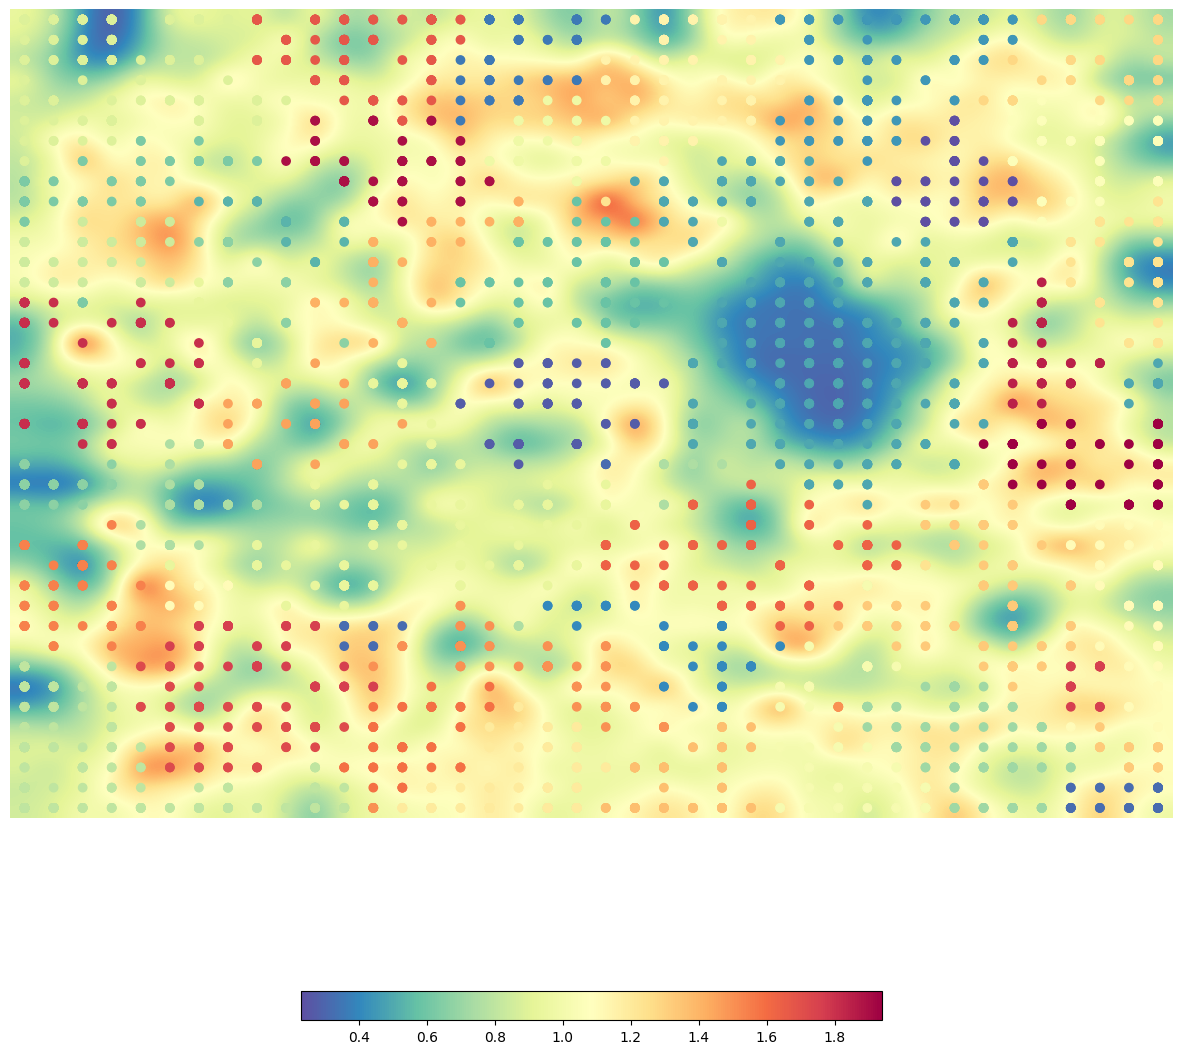

<module 'matplotlib.pyplot' from 'c:\\Users\\panos\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [6]:
som2.view_umatrix(bestmatches=True, colorbar=True,figsize=(15, 15))

In [136]:
import sys
np.set_printoptions(threshold=sys.maxsize, linewidth=200)
print(np.array(som2.clusters))

[[15 15 15 15 15 15 15 15 33 33 33 33 33 33 33 33  3  3  3  3  3 21 21 21 21 21  5  5  5  5  5  5  5  5  5 24 24 24 24 24]
 [15 15 15 15 15 15 15 15 33 33 33 33 33 33 33 33  3  3  3  3  3 21 21 21 21 21  5  5  5  5  5  5  5  5  5 24 24 24 24 24]
 [15 15 15 15 15 15 15 15 33 33 33 33 33 33 33  3  3  3  3  3 21 21 21 21 21 21 21  5  5  5  5  5  5  5 24 24 24 24 24 24]
 [15 15 15 15 15 15 15 15 33 33 33 33 33 33 33  3  3  3  3  3 21 21 21 21 21 21 21  5  5  5  5  5  5  5 24 24 24 24 24 24]
 [15 15 15 15 15 15 15 15 15 15 33 33 33 33 33  3  3  3 17 17 21 21 21 21 21 21  5  5  5  5  5  5  5 24 24 19 19 24 24 24]
 [15 15 15 15 15 15 15 15 15 15 38 38 38 33 38  3  3 17 17 17 17 21 21 21 21 21  5  5  5  5  5  0  0 39 19 19 19 19 19 19]
 [15 15 15 15  9  9  9  9 15 38 38 38 38 38 38 38 17 17 17 17 17 21 21 21 21 21  5  5  5  5  5  0  0  0 19 19 19 19 19 19]
 [15  9  9  9  9  9  9  9  9 38 38 38 38 38 38 38 17 17 17 17 17 21 21 21  6  6  6  6  5  5  0  0  0  0 19 19 19 19 19 19]
 [ 9  9  9  9  9

In [77]:
cluster_bmus = print_cluster_neurons_movies_report(11, bmus2, som2)
ids, stats = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Action', 133), ('ScienceFiction', 40), ('Action/Adventure', 39), ('Adventure', 29), ('Animation', 23), ('Fantasy', 22), ('Comedy', 19), ('Thriller', 16), ('JapaneseMovies', 14), ('MartialArtsFilm', 13), ('Anime', 12), ('Superheromovie', 11), ('Spy', 9), ('ChineseMovies', 9), ('Indie', 8), ('Horror', 6), ('Superhero', 5), ('Worldcinema', 5), ('Parody', 5), ('FamilyFilm', 4), ('Cult', 4), ('Dystopia', 4), ('Disaster', 3), ('Comedyfilm', 3), ('RomanceFilm', 3), ('ActionThrillers', 3), ('ShortFilm', 3), ('Satire', 2), ('AdventureComedy', 2), ('Western', 2), ('Televisionmovie', 2), ('Sports', 2), ("Children's", 2), ('AlienFilm', 2), ('Politicalthriller', 2), ('Comedy-drama', 1), ('ColdWar', 1), ('Comingofage', 1), ("Children's/Family", 1), ('Buddyfilm', 1), ('Bruceploitation', 1), ('Black-and-white', 1), ('B-movie', 1), ('Autoracing', 1), ('Animatedcartoon', 1), ('Apocalypticandpost-apocalypticfiction', 1), ('ZombieFilm', 1), ('CreatureFilm', 1), ('Doomsdayf

## **Ανάλυση τοπολογικών ιδιοτήτων χάρτη SOM**

### **1. Ανάλυση με βάση την συχνότητα εμφάνισης κατηγορίας**

In [73]:
cat_set = []

for movie in range(5000):
    cats = (categories[movie][0].replace(" ", "").replace('"', "")).split(",")
    cat_set.extend(cats)

cat_freqs = {i:cat_set.count(i) for i in set(cat_set)}

cat_freqs_sorted = sorted(cat_freqs.items(), key=lambda cat_freqs: -cat_freqs[1])


In [92]:
print(cat_freqs_sorted[:7])

[('Drama', 2229), ('Comedy', 1239), ('Thriller', 789), ('RomanceFilm', 781), ('Action', 715), ('Worldcinema', 573), ('CrimeFiction', 517)]


In [75]:
print(cat_freqs_sorted[-5:])

[('Movieserial', 1), ('Spacewestern', 1), ('Filipino', 1), ('Law&Crime', 1), ('Buddycop', 1)]


In [ ]:
cat_in_neurons = {}
for clust in range(40):
    cluster_bmus1 = print_cluster_neurons_movies_report(clust, bmus2, som2)
    ids1, stats1 = neuron_movies_report(cluster_bmus1, som2)
    for stat in stats1:
        if stat[0] in cat_in_neurons:
            cat_in_neurons[stat[0]] += 1
        else:
            cat_in_neurons[stat[0]] = 1

cat_in_neurons = sorted(cat_in_neurons.items(), key=lambda cat_in_neurons: -cat_in_neurons[1])


In [94]:
print(cat_in_neurons[:5])

[('Indie', 36), ('Comedy', 36), ('RomanceFilm', 35), ('Drama', 34), ('Adventure', 33)]


In [93]:
print(cat_in_neurons[-5:])

[('Mumblecore', 1), ('Albinobias', 1), ('AnimatedMusical', 1), ('CourtroomComedy', 1), ('Sci-FiThriller', 1)]


### **2. Μακρινά πρότυπα εισόδου**

In [124]:
cluster_bmus = print_cluster_neurons_movies_report(15, bmus2, som2)
ids, stats = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Comedy', 338), ('Musical', 45), ('Parody', 37), ('Worldcinema', 33), ('Slapstick', 30), ('Indie', 26), ('Adventure', 25), ('Satire', 23), ('CrimeFiction', 22), ('Blackcomedy', 21), ('FamilyFilm', 20), ('Bollywood', 16), ('ScienceFiction', 16), ('Sexcomedy', 13), ('Sports', 12), ('Fantasy', 9), ('Teen', 9), ("Children's/Family", 9), ('FantasyComedy', 8), ('Screwballcomedy', 8), ('Mockumentary', 8), ('Thriller', 7), ('WorkplaceComedy', 7), ('DomesticComedy', 7), ('Musicalcomedy', 7), ('CrimeComedy', 6), ('Cult', 6), ('JapaneseMovies', 6), ('Action/Adventure', 5), ('Comedy-drama', 5), ('Drama', 5), ('RomanceFilm', 5), ('EnsembleFilm', 4), ('Action', 4), ('Christmasmovie', 4), ('ComedyWestern', 4), ('Comingofage', 4), ('Comedyofmanners', 4), ('ComedyofErrors', 4), ('Politicalcinema', 4), ('AdventureComedy', 4), ("Children's", 4), ('Politicalsatire', 4), ('Comedyfilm', 3), ('ComedyThriller', 3), ('Absurdism', 3), ('Mystery', 3), ('Heist', 3), ('Western', 3),

In [129]:
cluster_bmus = print_cluster_neurons_movies_report(13, bmus2, som2)
ids, stats = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Drama', 209), ('RomanceFilm', 181), ('Romanticdrama', 159), ('Worldcinema', 153), ('Bollywood', 71), ('Musical', 70), ('Comedy', 32), ('Romanticcomedy', 26), ('Black-and-white', 19), ('CrimeFiction', 16), ('Thriller', 13), ('Action', 11), ('Warfilm', 11), ('Melodrama', 10), ('Action/Adventure', 9), ('Periodpiece', 8), ('Indie', 8), ('ChineseMovies', 7), ('Artfilm', 6), ('FilipinoMovies', 6), ('Fantasy', 5), ('MarriageDrama', 5), ('Comedy-drama', 5), ('FamilyDrama', 5), ('Politicaldrama', 5), ('EnsembleFilm', 4), ('FamilyFilm', 4), ('Music', 4), ('History', 4), ('CrimeThriller', 4), ('Teen', 4), ('ScienceFiction', 4), ('Mystery', 3), ('Televisionmovie', 3), ('Horror', 3), ('Sexcomedy', 3), ('Tamilcinema', 2), ('Comingofage', 2), ('Comedyfilm', 2), ('Christianfilm', 2), ('Adventure', 2), ('Silentfilm', 2), ('Roadmovie', 2), ('MusicalDrama', 2), ('Satire', 2), ('Romanticfantasy', 2), ('Spy', 1), ('Sports', 1), ("Children's", 1), ('Boxing', 1), ('Tollywood'

### **3. Κοντινά πρότυπα εισόδου**

In [131]:
cluster_bmus = print_cluster_neurons_movies_report(21, bmus2, som2)
ids, stats = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('ShortFilm', 119), ('Comedyfilm', 48), ('Animation', 27), ('Documentary', 13), ('Musical', 9), ('RomanceFilm', 6), ('Indie', 5), ('ComputerAnimation', 3), ('Parody', 3), ('Warfilm', 2), ('Music', 2), ('FamilyFilm', 2), ('ScienceFiction', 2), ('Biographicalfilm', 2), ('Sports', 2), ('Stopmotion', 2), ('EnsembleFilm', 1), ('Comedyofmanners', 1), ("Children's/Family", 1), ('Blackcomedy', 1), ('Culture&Society', 1), ('Animatedcartoon', 1), ('DomesticComedy', 1), ('Western', 1), ('HistoricalDocumentaries', 1), ('ExtremeSports', 1), ('Fanfilm', 1), ('Fantasy', 1), ('GenderIssues', 1), ('Musicalcomedy', 1), ('Politicaldrama', 1), ('Psychologicalthriller', 1), ('Romanticcomedy', 1), ('Slapstick', 1), ('Sliceoflifestory', 1), ('Socialissues', 1), ('Teen', 1), ('Adventure', 1)]


In [133]:
cluster_bmus = print_cluster_neurons_movies_report(3, bmus2, som2)
ids, stats = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Animation', 90), ('ShortFilm', 74), ('FamilyFilm', 50), ('Comedyfilm', 37), ('Comedy', 19), ('Musical', 9), ("Children's", 6), ('Thriller', 2), ('Mystery', 2), ('Drama', 2), ('ComputerAnimation', 1), ('Blackcomedy', 1), ('Western', 1), ('Documentary', 1), ('Warfilm', 1), ('Horror', 1), ('Music', 1), ('RomanceFilm', 1), ('Fantasy', 1)]


In [134]:
cluster_bmus = print_cluster_neurons_movies_report(17, bmus2, som2)
ids, stats = neuron_movies_report(cluster_bmus, som2)

Overall Cluster Genres stats:
[('Animation', 29), ('Fantasy', 9), ('Romanticcomedy', 5), ('RomanceFilm', 5), ('Musical', 5), ("Children's", 4), ("Children's/Family", 2), ('Worldcinema', 1), ('Epic', 1), ('Anime', 1), ('Black-and-white', 1), ("Children'sEntertainment", 1), ("Children'sFantasy", 1), ('ChineseMovies', 1), ('Comedyfilm', 1), ('FantasyAdventure', 1), ('Superheromovie', 1), ('Historicalfiction', 1), ('History', 1), ('Horror', 1), ('Indie', 1), ('Mystery', 1), ('Periodpiece', 1), ('ScienceFiction', 1), ('Stopmotion', 1), ('Action/Adventure', 1)]
